In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import  MLPClassifier
import joblib

In [2]:
df=pd.read_csv('sentimentdataset (Project 1).csv')
df.head()

,Source,ID,Message,Target
0,Yelp,0,Crust is not good.,0
1,Yelp,1,Not tasty and the texture was just nasty.,0
2,Yelp,2,Stopped by during the late May bank holiday of...,1
3,Yelp,3,The selection on the menu was great and so wer...,1
4,Yelp,4,Now I am getting angry and I want my damn pho.,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Source   2745 non-null   object
 1   ID       2745 non-null   int64 
 2   Message  2745 non-null   object
 3   Target   2745 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 85.9+ KB


In [4]:
df.describe()

,ID,Target
count,2745.000000,2745.000000
mean,464.711475,0.504554
std,276.335259,0.500070
min,0.000000,0.000000
25%,228.000000,0.000000
50%,457.000000,1.000000
75%,686.000000,1.000000
max,998.000000,1.000000


In [5]:
df.isna().sum()

Source     0
ID         0
Message    0
Target     0
dtype: int64

In [6]:
class_distribution = df['Target'].value_counts()
class_distribution

Target
1    1385
0    1360
Name: count, dtype: int64

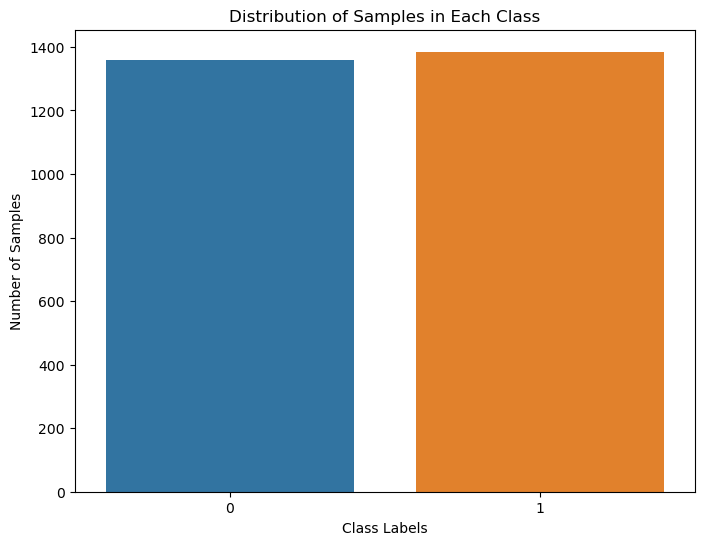

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Samples in Each Class')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()

In [8]:
df = df.drop(['ID', 'Source'], axis=1)
df.head()

,Message,Target
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0


In [9]:
nlp = spacy.load('en_core_web_sm')
nlp

In [10]:
df['Message']= df['Message'].apply(lambda x: x.lower())

In [11]:
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return tokens

df['Message'] = df['Message'].apply(preprocess_text)
df.head()

,Message,Target
0,"[crust, good, .]",0
1,"[tasty, texture, nasty, .]",0
2,"[stop, late, bank, holiday, rick, steve, recom...",1
3,"[selection, menu, great, price, .]",1
4,"[get, angry, want, damn, pho, .]",0


In [12]:
df['Message'] = df['Message'].apply(lambda tokens: ' '.join(tokens))

In [13]:
X = df['Message']
y = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=150)
X_train

2630        open , battery connection break device turn .
853     wife hate meal ( coconut shrimp ) , friend enj...
2386                                   wind - resistant .
2355                                   work europe asia .
1309    script look rough draft write shooting begin f...
                              ...                        
2354                                fit ear comfortable .
496                     crawfish experience , delicious !
25                                    - bring salad ask .
2490                                  fantastic buy phone
1252          plot hang , acting absolutely appalling .  
Name: Message, Length: 1921, dtype: object

In [14]:
vectorizer = CountVectorizer()
X_train =vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_train

<1921x3238 sparse matrix of type '<class 'numpy.int64'>'
	with 10451 stored elements in Compressed Sparse Row format>

In [15]:
linear_svc_model =LinearSVC(dual='auto',max_iter=10000)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(linear_svc_model , param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)

# Predict using the best model from grid search
y_pred = grid_search.predict(X_test)

# Evaluate the model
linear_svc_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", linear_svc_accuracy*100)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

C:\anaconda\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters: {'C': 0.1}
Accuracy: 81.55339805825243
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       413
           1       0.83      0.79      0.81       411

    accuracy                           0.82       824
   macro avg       0.82      0.82      0.82       824
weighted avg       0.82      0.82      0.82       824



In [16]:
ann_model  = MLPClassifier(hidden_layer_sizes=(128,), learning_rate_init=0.001, batch_size=64, max_iter=100)

# Train the model
ann_model .fit(X_train, y_train)

# Predict on the test set
y_pred = ann_model .predict(X_test)

# Evaluate the model
ann_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", ann_accuracy*100)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 76.94174757281553
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       413
           1       0.77      0.76      0.77       411

    accuracy                           0.77       824
   macro avg       0.77      0.77      0.77       824
weighted avg       0.77      0.77      0.77       824



C:\anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [17]:
if linear_svc_accuracy > ann_accuracy:
    best_model = grid_search
else:
    best_model = ann_model
joblib.dump(best_model, "models.pkl")  

['models.pkl']

In [18]:
model = joblib.load('models.pkl')

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy:', accuracy*100)

Test Accuracy: 81.55339805825243
